In [27]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping,TensorBoard


In [28]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 40
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)
early_stopping_monitor = EarlyStopping(patience=8,monitor='val_loss')


In [60]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [86]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [74]:
healthyt_generator = train_datagen.flow_from_directory(
        directory = '/content/drive/MyDrive/_train_test_val/train',  # this is the input directory
        target_size = (256, 256),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        classes=['Healthy'],
        class_mode = 'categorical',
        save_to_dir='/content/drive/MyDrive/_train_test_val/train/Healthy',
        save_prefix='Augmented',
        save_format='jpg',
        color_mode="rgb")

Found 652 images belonging to 1 classes.


In [62]:
i = 0
for batch in healthyt_generator:

    i += 1
    if i > 35: # save 20 images
        break  # otherwise the generator would loop indefinitely

In [84]:
healthyv_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/_train_test_val/val',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        classes=['Healthy'],
        class_mode='categorical',
        save_to_dir='/content/drive/MyDrive/_train_test_val/val/Healthy',
        save_prefix='Augmented',
        save_format='jpg',
        color_mode="rgb")

Found 198 images belonging to 1 classes.


In [77]:
i = 0
for batch in healthyv_generator:

    i += 1
    if i > 20: # save 20 images
        break  # otherwise the generator would loop indefinitely

In [87]:
train_generator = train_datagen.flow_from_directory(
        directory = '/content/drive/MyDrive/_train_test_val/train',  # this is the input directory
        target_size = (256, 256),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")

Found 2052 images belonging to 3 classes.


In [88]:
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/_train_test_val/val',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")

Found 598 images belonging to 3 classes.


In [90]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/_train_test_val/test',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        classes=['Healthy'],
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 16 images belonging to 1 classes.


In [91]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [93]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [94]:
history = model.fit(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,    #The 2 slashes division return rounded integer
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size,callbacks=early_stopping_monitor
        )

Epoch 1/40
128/128 [==============================] - 199s 2s/step - loss: 1.0624 - accuracy: 0.4082 - val_loss: 0.8933 - val_accuracy: 0.5405
Epoch 2/40
128/128 [==============================] - 193s 2s/step - loss: 0.4700 - accuracy: 0.7937 - val_loss: 0.2923 - val_accuracy: 0.8716
Epoch 3/40
128/128 [==============================] - 193s 2s/step - loss: 0.2940 - accuracy: 0.8811 - val_loss: 0.2172 - val_accuracy: 0.9139
Epoch 4/40
128/128 [==============================] - 194s 2s/step - loss: 0.2713 - accuracy: 0.8875 - val_loss: 0.2044 - val_accuracy: 0.9274
Epoch 5/40
128/128 [==============================] - 198s 2s/step - loss: 0.2735 - accuracy: 0.8910 - val_loss: 0.2451 - val_accuracy: 0.9122
Epoch 6/40
128/128 [==============================] - 210s 2s/step - loss: 0.2246 - accuracy: 0.9096 - val_loss: 0.2669 - val_accuracy: 0.9189
Epoch 7/40
128/128 [==============================] - 197s 2s/step - loss: 0.2061 - accuracy: 0.9194 - val_loss: 0.1792 - val_accuracy: 0.9240

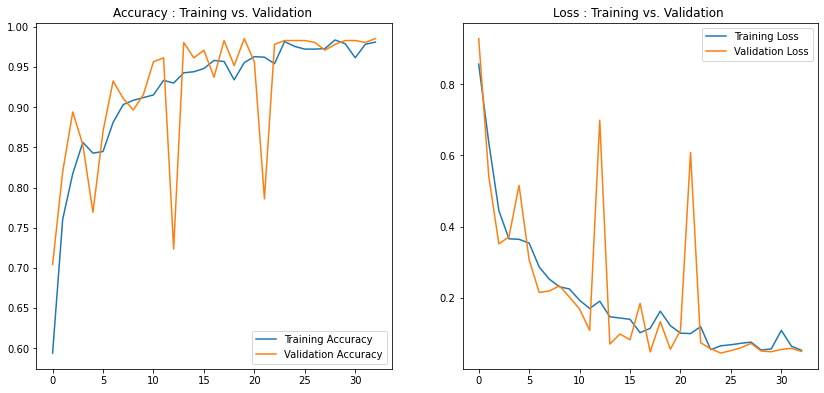

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.plot(range(33), accuracy, label='Training Accuracy')
plt.plot(range(33), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(33), loss, label='Training Loss')
plt.plot(range(33), val_loss, label='Validation Loss')
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.save('modelFS.h5')
model.save_weights('modelFSweights.h5')

In [ ]:
#checkpointer = ModelCheckpoint('best_model1.h5',monitor='accuracy',verbose=1,save_best_only=True,save_weights_only=True)

#Xception Model

In [ ]:
#instance of datagen
datagen=ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')




In [ ]:
tr_generator = train_datagen.flow_from_directory(
        directory = '/content/drive/MyDrive/_train_test_val/train',  # this is the input directory
        target_size = (128, 128),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")

Found 1506 images belonging to 3 classes.


In [ ]:
val_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/_train_test_val/val',
        target_size = (128, 128),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")

Found 430 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/_train_test_val/test',
        target_size = (128, 128),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 216 images belonging to 3 classes.


In [ ]:

SIZE = 128
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 20
BATCH_SIZE = 16
training_shape = (SIZE, SIZE, CHANNELS)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Input,MaxPooling2D, Activation,Dropout,GlobalAveragePooling2D,Average,AveragePooling2D,GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model


In [ ]:
from keras.applications.xception import Xception
base_model = Xception(include_top=False,weights='imagenet',input_shape = training_shape)

XCeptionmodel = base_model.output
XCeptionmodel = Flatten()(XCeptionmodel)

XCeptionmodel = BatchNormalization()(XCeptionmodel)
XCeptionmodel = Dense(128, activation='relu')(XCeptionmodel)
XCeptionmodel = Dropout(0.2)(XCeptionmodel)

XCeptionmodel = BatchNormalization()(XCeptionmodel)
XCeptionoutput = Dense(n_classes, activation = 'softmax')(XCeptionmodel)
XCeptionmodel = Model(inputs=base_model.input, outputs=XCeptionoutput)

TlModel = XCeptionmodel

for layer in base_model.layers:
    layer.trainable = True

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
TlModel.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])
history = TlModel.fit(tr_generator,
        steps_per_epoch = tr_generator.n // tr_generator.batch_size,
                    epochs = EPOCHS, 
                    validation_data = val_generator,
                    validation_steps = val_generator.n // val_generator.batch_size, 
                    callbacks=[learning_rate_reduction,early_stopping_monitor])

Epoch 1/40
94/94 [==============================] - 517s 5s/step - loss: 0.4648 - accuracy: 0.8396 - val_loss: 0.3893 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 2/40
94/94 [==============================] - 520s 6s/step - loss: 0.1853 - accuracy: 0.9336 - val_loss: 0.0841 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 3/40
94/94 [==============================] - 499s 5s/step - loss: 0.1242 - accuracy: 0.9577 - val_loss: 0.1000 - val_accuracy: 0.9591 - lr: 0.0010
Epoch 4/40
94/94 [==============================] - 499s 5s/step - loss: 0.1099 - accuracy: 0.9671 - val_loss: 0.0110 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/40
94/94 [==============================] - 495s 5s/step - loss: 0.2519 - accuracy: 0.9161 - val_loss: 8.4316 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 6/40
94/94 [==============================] - 501s 5s/step - loss: 0.1157 - accuracy: 0.9638 - val_loss: 0.0529 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 7/40
94/94 [==============================] - 498s 5s/step - loss: 0.0

In [ ]:
TlModel.save('XceptionModel.h5')
TlModel.save_weights('XceptionModelweights.h5')

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.plot(range(17), accuracy, label='Training Accuracy')
plt.plot(range(17), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(17), loss, label='Training Loss')
plt.plot(range(17), val_loss, label='Validation Loss')
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.show()

#Inception_V3

In [ ]:
tr_generator_inc = train_datagen.flow_from_directory(
        directory = '/content/drive/MyDrive/_train_test_val/train',  # this is the input directory
        target_size = (299, 299),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")

In [ ]:
val_generator_inc = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/_train_test_val/val',
        target_size = (299, 299),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")

In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/_train_test_val/test',
        target_size = (299, 299),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
)

In [ ]:
# InceptionV3 model & pre-trained weights
module_url = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
m = tf.keras.Sequential([
    hub.KerasLayer(module_url, output_shape=[2048], trainable=False),
    tf.keras.layers.Dense(n_classes, activation="softmax")
])

m.build([None, 299, 299, 3])
m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
m.summary()